In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

26 positive controls; 77 negative controls; 170 treatments

In [107]:
def runknnmodel(data, featureset):

    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    
    if (featureset == "all"):
        features = [col for col in data.columns if col.startswith('CYTOPLASM_') or col.startswith('CELLS_') or col.startswith('NUCLEI_')]

    else:
        features = ["CELLS_Neighbors_SecondClosestObjectNumber_5"]
        
    # Filter the dataset for training (0 and 1) and testing (2)
    train_data = data[data['Image_Metadata_Compound'].isin([0, 1])]
    test_data = data[data['Image_Metadata_Compound'] == 2]

    # Prepare training features and labels
    X_train = train_data[features]
    y_train = (train_data['Image_Metadata_Compound'] == 1).astype(int)

    # Prepare test features and compound IDs
    X_test = test_data[features]
    compound_ids = test_data['id']

    # Perform balanced downsampling by reducing the majority class size to the minority class size
    balanced_predictions = []

    # Loop through 100 iterations
    for _ in range(100):
        # Separate positive and negative classes
        X_train_positive = X_train[y_train == 1]
        X_train_negative = X_train[y_train == 0]

        # Find the minority class size
        minority_size = min(len(X_train_positive), len(X_train_negative)) 

        # Downsample the majority class
        X_train_positive_downsampled = resample(X_train_positive, replace=True, n_samples=minority_size, random_state=np.random.randint(1000))
        X_train_negative_downsampled = resample(X_train_negative, replace=True, n_samples=minority_size, random_state=np.random.randint(1000))

        # Combine the downsampled majority class with the minority class
        X_train_resampled = pd.concat([X_train_positive_downsampled, X_train_negative_downsampled])
        y_train_resampled = np.array([1] * len(X_train_positive_downsampled) + [0] * len(X_train_negative_downsampled))

        # Shuffle the data
        perm = np.random.permutation(len(y_train_resampled))
        X_train_resampled = X_train_resampled.iloc[perm]
        y_train_resampled = y_train_resampled[perm]

        # Train the classifier
        knn.fit(X_train_resampled, y_train_resampled)

        # Predict on the test set
        y_pred = knn.predict(X_test)
        balanced_predictions.append(y_pred)

    # Use majority voting for final classification
    final_predictions = np.round(np.mean(balanced_predictions, axis=0)).astype(int)

    # Map predictions to compound IDs and count how many are predicted as 1
    positive_ids = compound_ids[final_predictions == 1].tolist()
    num_positive = len(positive_ids)

    # Create a DataFrame of results
    results_df = pd.DataFrame({
        "Compound": compound_ids,
        "Prediction": final_predictions
    })

    print(num_positive)
    compounds_Features = set(results_df[results_df["Prediction"]==1].Compound.to_list())
    
    return compounds_Features

In [154]:
data = pd.read_csv("data/Unet_Features.csv")
compounds_Unet_Features = runknnmodel(data, "all")
compounds_Unet_cellcount = runknnmodel(data, "baseline")

10
20


In [155]:
data = pd.read_csv("data/cWGAN-GP_Features.csv")
compounds_cWGAN_Features = runknnmodel(data, "all")
compounds_cWGAN_cellcount = runknnmodel(data, "baseline")

14
19


In [156]:
data = pd.read_csv("data/GroundTruth_Features.csv")
compounds_GroundTruth_Features = runknnmodel(data, "all")
compounds_GroundTruth_cellcount = runknnmodel(data, "baseline")

7
19


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


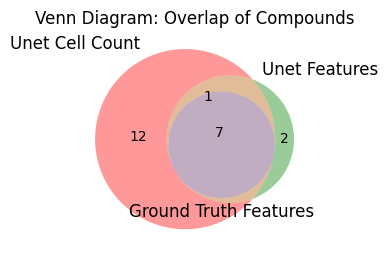

In [168]:

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2

# Create the Venn diagram
plt.figure(figsize=(3, 3), dpi=100)
venn = venn3(
    [compounds_Unet_cellcount, compounds_Unet_Features, compounds_GroundTruth_Features],
    set_labels=("Unet Cell Count", "Unet Features", "Ground Truth Features")
)

# Customize the diagram if needed
plt.title("Venn Diagram: Overlap of Compounds")
plt.show()


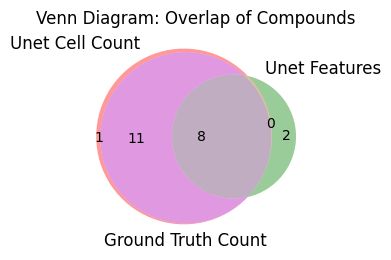

In [169]:

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2

# Create the Venn diagram
plt.figure(figsize=(3, 3), dpi=100)
venn = venn3(
    [compounds_Unet_cellcount, compounds_Unet_Features, compounds_GroundTruth_cellcount],
    set_labels=("Unet Cell Count", "Unet Features", "Ground Truth Count")
)

# Customize the diagram if needed
plt.title("Venn Diagram: Overlap of Compounds")
plt.show()


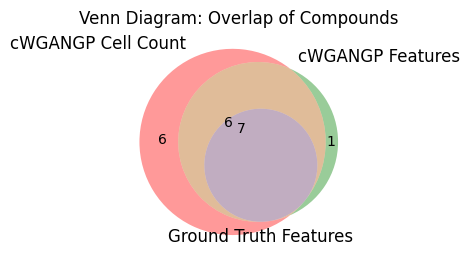

In [167]:
# Create the Venn diagram
plt.figure(figsize=(3,3), dpi=100)
venn = venn3(
    [compounds_cWGAN_cellcount, compounds_cWGAN_Features, compounds_GroundTruth_Features],
    set_labels=("cWGANGP Cell Count", "cWGANGP Features", "Ground Truth Features")
)

# Customize the diagram if needed
plt.title("Venn Diagram: Overlap of Compounds")
plt.show()

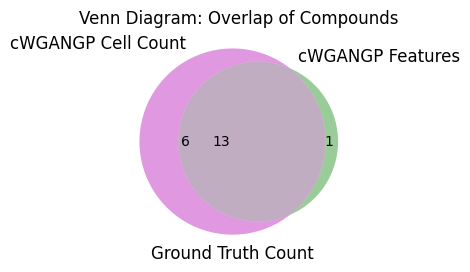

In [175]:
# Create the Venn diagram
plt.figure(figsize=(3,3), dpi=100)
venn = venn3(
    [compounds_cWGAN_cellcount, compounds_cWGAN_Features, compounds_GroundTruth_cellcount],
    set_labels=("cWGANGP Cell Count", "cWGANGP Features", "Ground Truth Count")
)

# Customize the diagram if needed
plt.title("Venn Diagram: Overlap of Compounds")
plt.show()

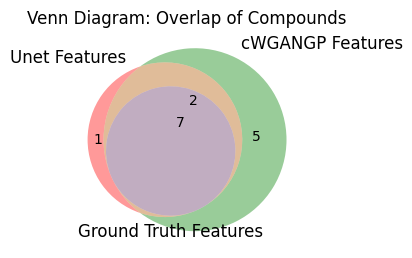

In [166]:
# Create the Venn diagram
plt.figure(figsize=(3, 3), dpi=100)
venn = venn3(
    [compounds_Unet_Features, compounds_cWGAN_Features, compounds_GroundTruth_Features],
    set_labels=("Unet Features", "cWGANGP Features", "Ground Truth Features")
)

# Customize the diagram if needed
plt.title("Venn Diagram: Overlap of Compounds")
plt.show()

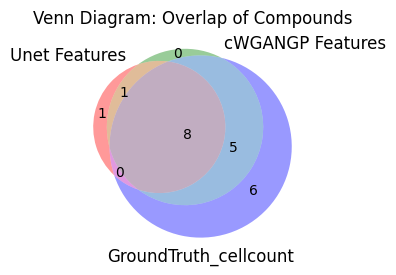

In [176]:
# Create the Venn diagram
plt.figure(figsize=(3, 3), dpi=100)
venn = venn3(
    [compounds_Unet_Features, compounds_cWGAN_Features, compounds_GroundTruth_cellcount],
    set_labels=("Unet Features", "cWGANGP Features", "GroundTruth_cellcount")
)

# Customize the diagram if needed
plt.title("Venn Diagram: Overlap of Compounds")
plt.show()

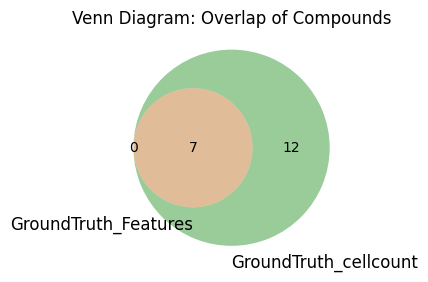

In [160]:
# Create the Venn diagram
plt.figure(figsize=(3, 3), dpi=100)
venn = venn2(
    [compounds_GroundTruth_Features, compounds_GroundTruth_cellcount],
    set_labels=("GroundTruth_Features", "GroundTruth_cellcount")
)

# Customize the diagram if needed
plt.title("Venn Diagram: Overlap of Compounds")
plt.show()

<Figure size 4800x4800 with 0 Axes>

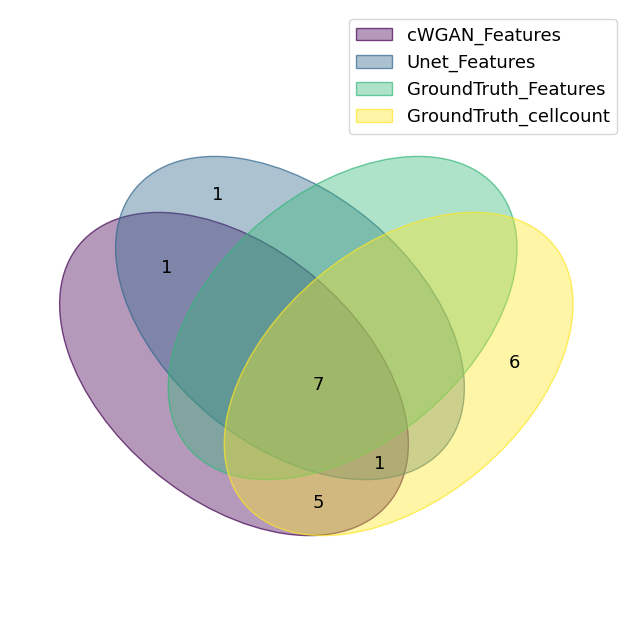

In [194]:
from venn import venn
import matplotlib.pyplot as plt

# Define your sets
sets = {
    "cWGAN_Features": set(compounds_cWGAN_Features),
    "Unet_Features": set(compounds_Unet_Features),
    "GroundTruth_Features": set(compounds_GroundTruth_Features),
    "GroundTruth_cellcount": set(compounds_GroundTruth_cellcount),
}

# Filter out empty subsets
filtered_sets = {k: v for k, v in sets.items() if v}

# Create the Venn diagram
plt.figure(figsize=(16, 16), dpi=300)
venn_diagram = venn(filtered_sets)

# Optionally, remove '0' labels post-plotting (if still visible)
for label in venn_diagram.texts:
    if label.get_text() == "0":
        label.set_text("")  # Replace "0" with an empty string

# Show the diagram
plt.show()
